In [52]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

import re

In [2]:
df = pd.read_csv("toxic-comments.csv")

In [94]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.shape, df.columns

((159571, 8),
 Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
        'insult', 'identity_hate'],
       dtype='object'))

In [5]:
toxicities = ['toxic', 'severe_toxic', 'obscene', 'threat',
              'insult', 'identity_hate']

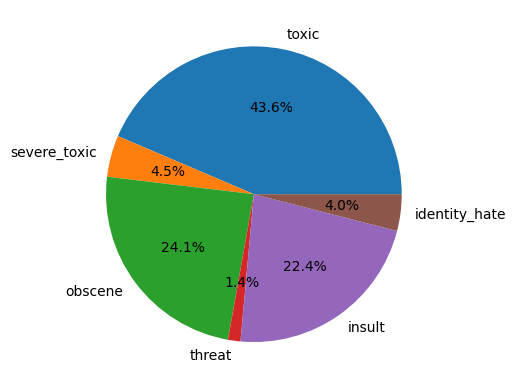

In [6]:
counts = [len(df[df[label] == 1]) for label in toxicities]
plt.pie(counts, labels=toxicities, autopct='%1.1f%%')
plt.show()

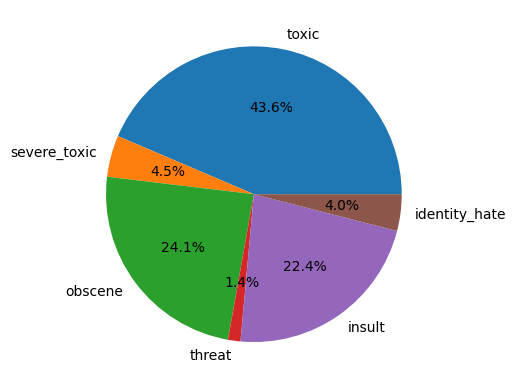

In [7]:
comments = df.sum(numeric_only=True)
plt.pie(comments.values, labels=comments.index, autopct='%1.1f%%')
plt.show()

In [8]:
comments

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [16]:
neutral_df = df[df.sum(axis=1, numeric_only=True) == 0]

In [18]:
neutral = len(neutral_df)
toxic = len(df)-len(neutral_df)
neutral, toxic

(143346, 16225)

In [35]:
newdf = pd.DataFrame({
    'neutral' : neutral,
    'toxic' : toxic,
}, index=[0])

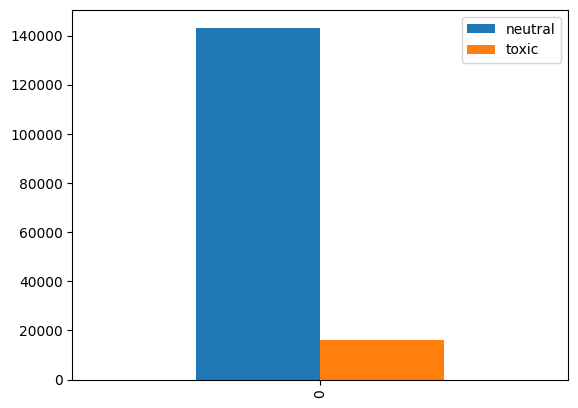

In [36]:
newdf.plot(kind='bar')
plt.show()

<Axes: >

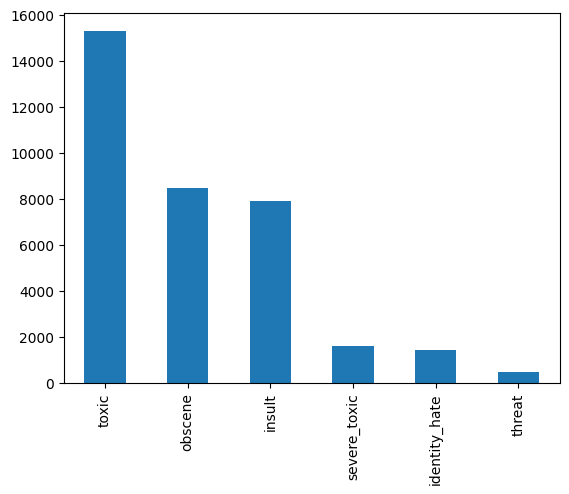

In [47]:
df.sum(axis=0, numeric_only=True).sort_values(ascending=False).plot(kind='bar')

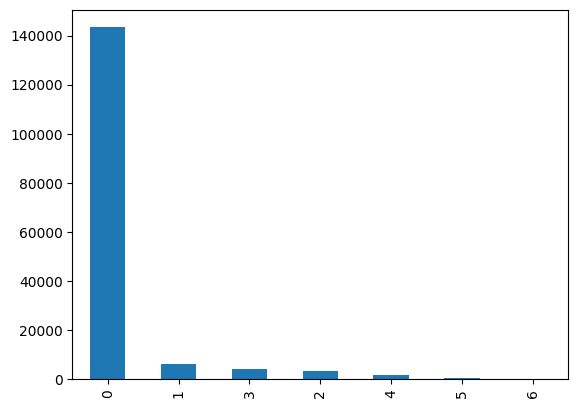

In [44]:
df.sum(axis=1, numeric_only=True).value_counts().plot(kind='bar')
plt.show()

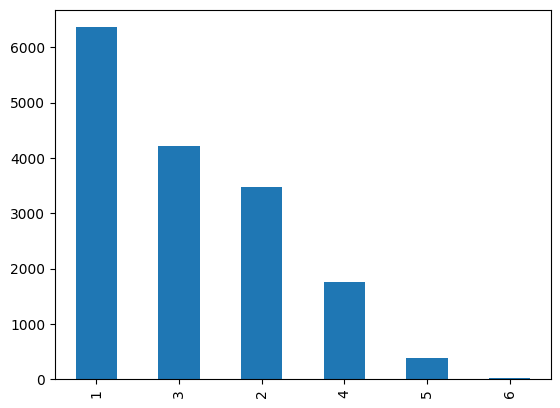

In [50]:
df.sum(axis=1, numeric_only=True).value_counts().iloc[1:].plot(kind='bar')
plt.show()

In [51]:
df.sum(axis=1, numeric_only=True).value_counts().iloc[1:]

1    6360
3    4209
2    3480
4    1760
5     385
6      31
Name: count, dtype: int64

### Data Cleaning

In [60]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9]+", " ", text)
    return text

In [56]:
sent = '''::::Jmabel; in regards to predominant scholary consensus who is it that allegedly claims ""despite ""Third Way"" rhetoric, fascism in power functioned rather consistently as a right-wing force""? As far as I'm aware (owning numerous books on the subject) that is not the scholary consensus at all. The consensus, developed by respected scholars of fascism who write in a manner which is not bias to any interest group such as Roger Griffin, Hamish McDonald, Roger Eatwell and Zeev Sternhell all recongise fascism as a ""Third Way"" as the references show.\n\nThe only dissenters I'm aware of who seem to think fascism has absoutely no leftist connections and is merely a radical right system are street level socialists who want to put as much distance between the movements as possible. This of course does not come from educated people in a position to write books. For example, even the foremost scholary expert on Fascism, and a former member of both the Communist Party and then Socialist Party of Italy, Renzo De Felice doesn't try to ""cover up"" its socialistic origins and third way status. This is a man who has wrote a definitive seven volume piece on Mussolini. -   \n\n'''

In [61]:
clean_text(sent)

' jmabel in regards to predominant scholary consensus who is it that allegedly claims despite third way rhetoric fascism in power functioned rather consistently as a right wing force as far as i m aware owning numerous books on the subject that is not the scholary consensus at all the consensus developed by respected scholars of fascism who write in a manner which is not bias to any interest group such as roger griffin hamish mcdonald roger eatwell and zeev sternhell all recongise fascism as a third way as the references show the only dissenters i m aware of who seem to think fascism has absoutely no leftist connections and is merely a radical right system are street level socialists who want to put as much distance between the movements as possible this of course does not come from educated people in a position to write books for example even the foremost scholary expert on fascism and a former member of both the communist party and then socialist party of italy renzo de felice doesn 

#### Input data

In [62]:
comment_text = df["comment_text"].apply(clean_text)

In [63]:
comment_text

0         explanation why the edits made under my userna...
1         d aww he matches this background colour i m se...
2         hey man i m really not trying to edit war it s...
3          more i can t make any real suggestions on imp...
4         you sir are my hero any chance you remember wh...
                                ...                        
159566     and for the second time of asking when your v...
159567    you should be ashamed of yourself that is a ho...
159568    spitzer umm theres no actual article for prost...
159569    and it looks like it was actually you who put ...
159570     and i really don t think you understand i cam...
Name: comment_text, Length: 159571, dtype: object

In [83]:
labels = df[toxicities].to_numpy()

In [84]:
labels

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], shape=(159571, 6))

### Prepare the input data

In [85]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, GRU, Dense
from sklearn.model_selection import train_test_split

In [86]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(comment_text)
sequences = tokenizer.texts_to_sequences(comment_text)
padded = pad_sequences(sequences, maxlen=200)

In [87]:
padded.shape

(159571, 200)

In [88]:
padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### Cross Validation

In [89]:
X_train, X_test, y_train, y_test = train_test_split(padded, labels, random_state=0, test_size=0.2)
X_train.shape, y_train.shape

((127656, 200), (127656, 6))

In [90]:
X_test.shape, y_test.shape

((31915, 200), (31915, 6))

### Build the Model


In [91]:
model = Sequential()
model.add(Embedding(5000, 100))
model.add(GRU(64))
model.add(Dense(6, activation='sigmoid'))

In [92]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [93]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [ ]:
history_gru = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

In [ ]:
sample_text1='You are stupid. No one cares about your opinion. Just shut up.'
sample_text2='You are waste of time. World is better without you.'
sample_text3='Your life will be so beautiful with her.'
sample_text4='I will come to your house and kill you in your sleep. I will hound you to the ends of the earth. I will make your life hell'
sample_text5 = "Shut up. You are worthless. Go stuff yourself in your own ass"

In [95]:
def predict(sample_text):
  clean=clean_text(sample_text)
  clean=tokenizer.texts_to_sequences([clean])
  clean=pad_sequences(clean, maxlen=200, padding='post')
  y_pred=model(clean)
  output_label=[]
  for label,item in zip(toxicities,y_pred.numpy()[0]):
    if item>=0.5:
      output_label.append(label)
  print(output_label)

In [ ]:
predict(sample_text1)
predict(sample_text2)
predict(sample_text3)
predict(sample_text4)
predict(sample_text5)